In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Target = mpg

In [2]:
df = sns.load_dataset('mpg')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.name.nunique()

305

In [7]:
df.drop(['name'], axis=1, inplace = True)

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [11]:
df.isnull().sum().any()

False

In [12]:
df.shape

(392, 8)

In [13]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [14]:
from datetime import datetime

In [15]:
today = datetime.today()

In [16]:
this_year=today.year
this_year

2020

In [17]:
df['age'] = this_year - (1900+df['model_year'])

In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,50
1,15.0,8,350.0,165.0,3693,11.5,70,usa,50
2,18.0,8,318.0,150.0,3436,11.0,70,usa,50
3,16.0,8,304.0,150.0,3433,12.0,70,usa,50
4,17.0,8,302.0,140.0,3449,10.5,70,usa,50


In [19]:
df.drop(['model_year'], axis = 1, inplace = True)

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,50
1,15.0,8,350.0,165.0,3693,11.5,usa,50
2,18.0,8,318.0,150.0,3436,11.0,usa,50
3,16.0,8,304.0,150.0,3433,12.0,usa,50
4,17.0,8,302.0,140.0,3449,10.5,usa,50


# object olanlari modele sokm ak icin sayisal olmali - get_dummies yaptik

In [21]:
df = pd.get_dummies(df, drop_first= True) # drop first ile dummy'leri azaltmak

In [22]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
236,25.5,4,140.0,89.0,2755,15.8,43,0,1
47,19.0,6,250.0,100.0,3282,15.0,49,0,1
214,13.0,8,302.0,130.0,3870,15.0,44,0,1
52,30.0,4,88.0,76.0,2065,14.5,49,0,0
335,35.0,4,122.0,88.0,2500,15.1,40,0,0
44,13.0,8,400.0,175.0,5140,12.0,49,0,1
384,32.0,4,91.0,67.0,1965,15.7,38,1,0
189,15.5,8,304.0,120.0,3962,13.9,44,0,1
186,27.0,4,101.0,83.0,2202,15.3,44,0,0
143,26.0,4,97.0,78.0,2300,14.5,46,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int64  
 7   origin_japan  392 non-null    uint8  
 8   origin_usa    392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 25.3 KB


In [25]:
X = df.drop(['mpg'], axis=1)
y = df['mpg']

In [26]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,50,0,1
1,8,350.0,165.0,3693,11.5,50,0,1
2,8,318.0,150.0,3436,11.0,50,0,1
3,8,304.0,150.0,3433,12.0,50,0,1
4,8,302.0,140.0,3449,10.5,50,0,1


In [27]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lm.intercept_

79.20294463155584

In [33]:
lm.coef_

array([-0.34210131,  0.01920596, -0.0216204 , -0.00642267,  0.04219811,
       -0.79716146,  0.33046978, -2.87549946])

In [34]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
cylinders,-0.342101
displacement,0.019206
horsepower,-0.021620
weight,-0.006423
acceleration,0.042198
age,-0.797161
origin_japan,0.330470
origin_usa,-2.875499


In [35]:
y_pred=lm.predict(X_test)

In [36]:
y_pred_train=lm.predict(X_train)

In [37]:
eval_metrics(y_test, y_pred)

r2_score: 0.7922774714022585 
 mae: 2.4619996980661467 
 mse: 10.60227901168835 
 rmse: 3.2561140968473983


In [38]:
eval_metrics(y_train, y_pred_train)

r2_score: 0.8286865575852229 
 mae: 2.5445826417298 
 mse: 10.809834360243093 
 rmse: 3.2878312548309245


In [39]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [41]:
compare.sample(10)

,Actual,Pred
276,21.6,26.902469
57,24.0,26.040814
73,13.0,12.683117
358,31.6,31.628997
114,26.0,26.411013
241,22.0,26.441800
210,19.0,24.902464
117,29.0,29.446287
115,15.0,14.042393
159,14.0,11.919123


In [44]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


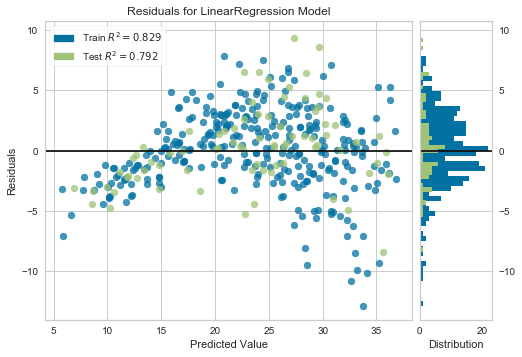

In [45]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = lm
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

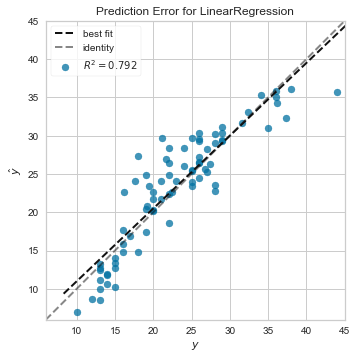

In [46]:
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
model = lm
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure